<a href="https://colab.research.google.com/github/UBDBD/Machine-Learning_Project/blob/main/Predict%20overheating%20points%20for%20efficient%20temperature%20management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import random
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 데이터 불러오기
path = './Data/temperature_data.xlsx'
df = pd.read_excel(path)

df

,a,b,c,d,loc_idx
0,51.562500,42.216797,37.382812,29.648438,1
1,36.093750,31.582031,28.037109,27.714844,1
2,36.416016,30.615234,29.003906,27.070312,1
3,35.771484,30.937500,28.037109,27.392578,1
4,35.771484,30.615234,28.037109,27.070312,1
...,...,...,...,...,...
4140,25.958984,26.281250,27.570312,28.537109,9
4141,26.281250,25.636719,26.925781,27.892578,9
4142,26.281250,25.958984,26.925781,28.214844,9
4143,26.281250,25.958984,27.570312,28.859375,9


In [ ]:
df_1 = df[df['loc_idx'] == 1]
df_2 = df[df['loc_idx'] == 2]
df_3 = df[df['loc_idx'] == 3]
df_4 = df[df['loc_idx'] == 4]
df_5 = df[df['loc_idx'] == 5]
df_6 = df[df['loc_idx'] == 6]
df_7 = df[df['loc_idx'] == 7]
df_8 = df[df['loc_idx'] == 8]
df_9 = df[df['loc_idx'] == 9]

# 데이터 분석

## 평행 좌표 그래프


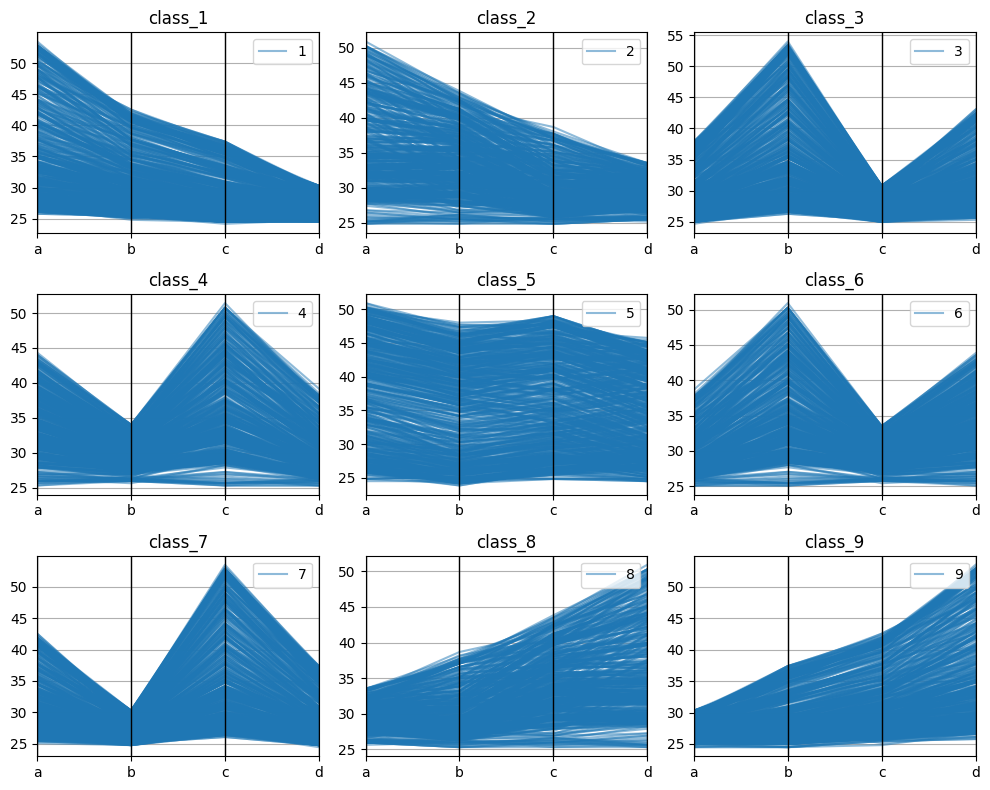

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
axes = axes.flatten()

for i, df_num in enumerate([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9]):
    parallel_coordinates(df_num, 'loc_idx', colormap='tab10', ax=axes[i], alpha=0.5)

    axes[i].set_title(f'class_{i+1}')

plt.tight_layout()
plt.show()

## 주성분 분석

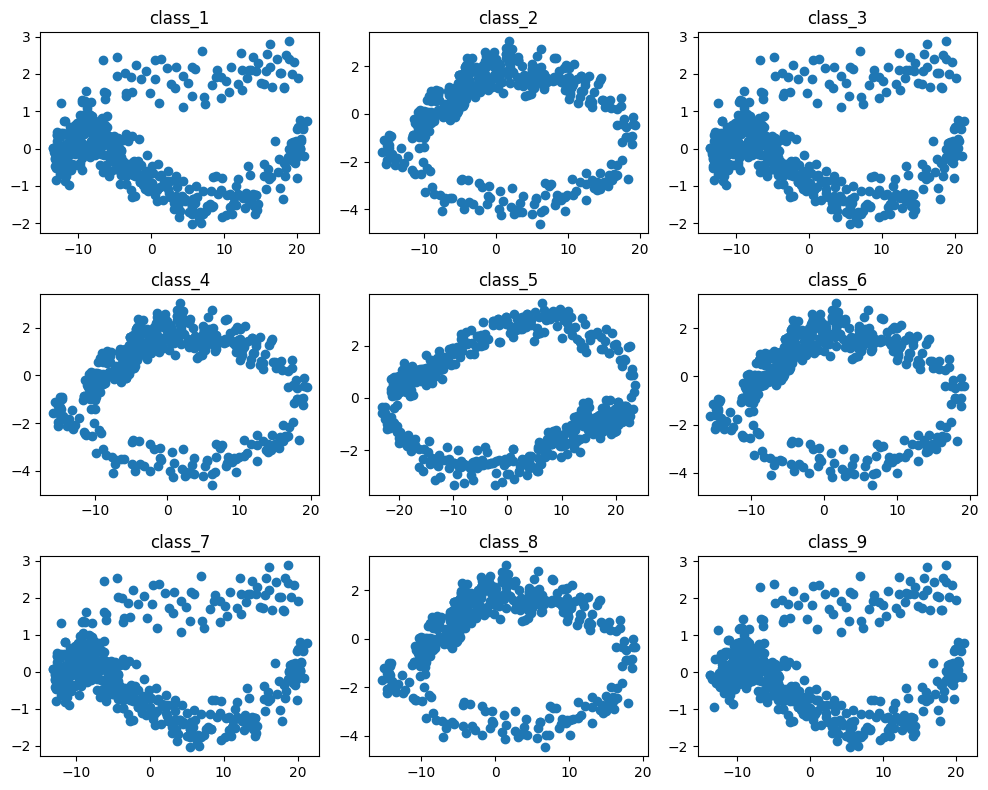

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
axes = axes.flatten()

for i, df_num in enumerate([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9]):
    X = df_num.drop('loc_idx', axis=1)

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    axes[i].scatter(X_pca[:, 0], X_pca[:, 1])
    axes[i].set_title(f'class_{i+1}')

plt.tight_layout()
plt.show()

## 상관관계


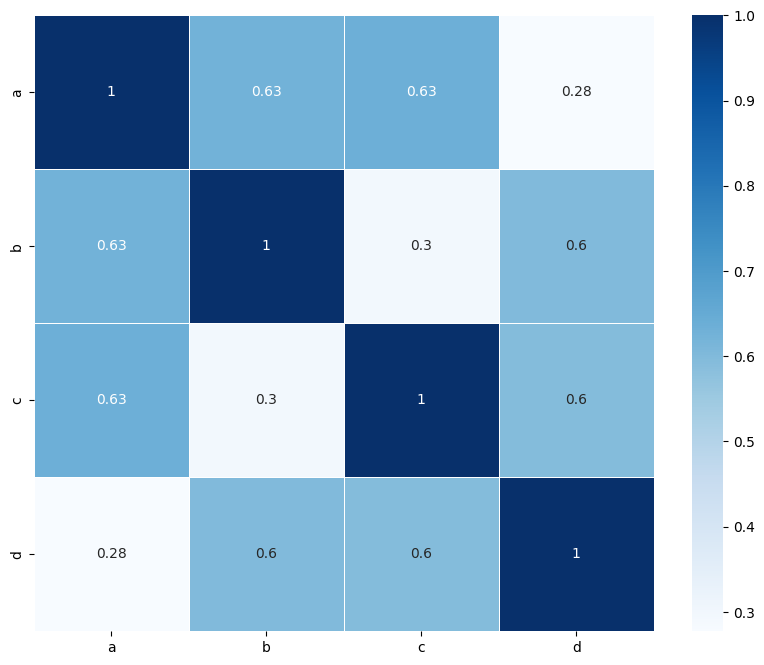

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.iloc[:,:4].corr(), annot=True, cmap='Blues', linewidths=0.5)
plt.show()

#모델 비교

In [ ]:
# 데이터 셋 분리
train, test = train_test_split(df, test_size = 0.2, random_state = 42)

X_train = train.iloc[:, 0:4]
X_test = test.iloc[:, 0:4]

y_train = train.iloc[:,-1:]
y_test = test.iloc[:,-1:]

In [ ]:
X_train.head()

,a,b,c,d
3937,26.748047,29.003906,30.937500,32.871094
178,42.216797,34.482422,29.970703,28.037109
668,42.216797,38.994141,31.259766,31.259766
3336,28.681641,27.392578,33.837891,32.871094
787,42.539062,34.160156,33.837891,29.326172


In [ ]:
y_train.head()

,loc_idx
3937,9
178,1
668,2
3336,8
787,2


## 로지스틱 회귀

In [ ]:
# 하이퍼 파라미터 튜닝
'''
lr_param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

lr_model = LogisticRegression()

lr_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=5)

lr_grid_search.fit(X_train, y_train)

print("로지스틱 회귀 최적 하이퍼파라미터:", lr_grid_search.best_params_)
'''

로지스틱 회귀 최적 하이퍼파라미터: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
# 성능 평가
lr_model = LogisticRegression(C=10, penalty='l1', solver='liblinear' )

scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy')

print(f"교차 검증 점수: {scores}")
print(f"평균 교차 검증 점수: {scores.mean()}")
print()

lr_model.fit(X_train, y_train)

start_time = time.time()
lr_y_pred = lr_model.predict(X_test)
lr_training_time = time.time() - start_time

print(classification_report(y_test, lr_y_pred))
print()
print('예측시간:', lr_training_time)

교차 검증 점수: [0.89759036 0.88687783 0.85520362 0.87330317 0.85520362]
평균 교차 검증 점수: 0.8736357193479801

              precision    recall  f1-score   support

           1       0.91      1.00      0.95       117
           2       0.99      0.75      0.85        88
           3       0.90      0.96      0.93        95
           4       0.83      0.88      0.86        94
           5       0.85      0.58      0.69        98
           6       0.96      0.89      0.92        95
           7       0.85      0.94      0.89        83
           8       0.80      0.94      0.87        83
           9       0.84      0.96      0.90        76

    accuracy                           0.88       829
   macro avg       0.88      0.88      0.87       829
weighted avg       0.88      0.88      0.87       829


예측시간: 0.001996755599975586


## 서포트 벡터 머신

In [ ]:
# 하이퍼 파라미터 튜닝
'''
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

svm_model = SVC()

svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5)

svm_grid_search.fit(X_train, y_train)

print("서포트 벡터 머신 최적 하이퍼파라미터:", svm_grid_search.best_params_)
'''

서포트 벡터 머신 최적 하이퍼파라미터: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [ ]:
# 성능 평가
svm_model = SVC(C=10, gamma='auto', kernel='rbf')

scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')

print(f"교차 검증 점수: {scores}")
print(f"평균 교차 검증 점수: {scores.mean()}")
print()

svm_model.fit(X_train, y_train)

start_time = time.time()
svm_y_pred = svm_model.predict(X_test)
svm_training_time = time.time() - start_time

print(classification_report(y_test, svm_y_pred))
print()
print('예측시간:', svm_training_time)

교차 검증 점수: [0.97289157 0.96832579 0.9638009  0.95625943 0.95776772]
평균 교차 검증 점수: 0.9638090824837813

              precision    recall  f1-score   support

           1       0.96      0.99      0.97       117
           2       0.99      0.94      0.97        88
           3       0.96      0.97      0.96        95
           4       0.92      0.96      0.94        94
           5       1.00      0.93      0.96        98
           6       0.97      0.92      0.94        95
           7       0.95      0.95      0.95        83
           8       0.94      0.99      0.96        83
           9       0.96      1.00      0.98        76

    accuracy                           0.96       829
   macro avg       0.96      0.96      0.96       829
weighted avg       0.96      0.96      0.96       829


예측시간: 0.10692739486694336


## 랜덤 포레스트


In [ ]:
# 하이퍼 파라미터 튜닝
'''
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier()

rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5)

rf_grid_search.fit(X_train, y_train)

print("랜덤 포레스트 최적 하이퍼파라미터:", rf_grid_search.best_params_)
'''

랜덤 포레스트 최적 하이퍼파라미터: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# 성능 평가
rf_model = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200)

scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

print(f"교차 검증 점수: {scores}")
print(f"평균 교차 검증 점수: {scores.mean()}")
print()

rf_model.fit(X_train, y_train)

start_time = time.time()
rf_y_pred = rf_model.predict(X_test)
rf_training_time = time.time() - start_time

print(classification_report(y_test, rf_y_pred))
print()
print('예측시간:', rf_training_time)

교차 검증 점수: [0.96987952 0.97285068 0.9638009  0.95324284 0.96229261]
평균 교차 검증 점수: 0.9644133093459812

              precision    recall  f1-score   support

           1       0.95      1.00      0.97       117
           2       1.00      0.92      0.96        88
           3       0.97      0.99      0.98        95
           4       0.95      0.95      0.95        94
           5       0.98      0.95      0.96        98
           6       1.00      0.98      0.99        95
           7       0.96      0.99      0.98        83
           8       0.98      0.99      0.98        83
           9       0.99      1.00      0.99        76

    accuracy                           0.97       829
   macro avg       0.97      0.97      0.97       829
weighted avg       0.97      0.97      0.97       829


예측시간: 0.0393068790435791


## k-최근접 이웃

In [ ]:
# 하이퍼 파라미터 튜닝
'''
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_model = KNeighborsClassifier()

knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=5)

knn_grid_search.fit(X_train, y_train)

print("k-최근접 이웃 최적 하이퍼파라미터:", knn_grid_search.best_params_)
'''

k-최근접 이웃 최적 하이퍼파라미터: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [ ]:
# 성능 평가
knn_model = KNeighborsClassifier(metric='manhattan', n_neighbors=5, weights='distance')

scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')

print(f"교차 검증 점수: {scores}")
print(f"평균 교차 검증 점수: {scores.mean()}")
print()

knn_model.fit(X_train, y_train)

start_time = time.time()
knn_y_pred = knn_model.predict(X_test)
knn_training_time = time.time() - start_time

print(classification_report(y_test, knn_y_pred))
print()
print('예측시간:', knn_training_time)

교차 검증 점수: [0.96536145 0.96983409 0.94871795 0.94570136 0.95475113]
평균 교차 검증 점수: 0.9568731941340021

              precision    recall  f1-score   support

           1       0.94      1.00      0.97       117
           2       1.00      0.92      0.96        88
           3       0.97      0.99      0.98        95
           4       0.93      0.95      0.94        94
           5       0.99      0.93      0.96        98
           6       0.99      0.96      0.97        95
           7       0.95      0.96      0.96        83
           8       0.94      0.96      0.95        83
           9       0.97      1.00      0.99        76

    accuracy                           0.96       829
   macro avg       0.97      0.96      0.96       829
weighted avg       0.96      0.96      0.96       829


예측시간: 0.007903575897216797


## 나이브 베이즈

In [ ]:
# 하이퍼 파라미터 튜닝
'''
nb_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

nb_model = GaussianNB()

nb_grid_search = GridSearchCV(nb_model, nb_param_grid, cv=5)

nb_grid_search.fit(X_train, y_train)

print("나이브 베이즈 최적 하이퍼파라미터:", nb_grid_search.best_params_)
'''

나이브 베이즈 최적 하이퍼파라미터: {'var_smoothing': 1e-09}


In [ ]:
# 성능 평가
nb_model = GaussianNB(var_smoothing=1e-09)

scores = cross_val_score(nb_model, X_train, y_train, cv=5, scoring='accuracy')

print(f"교차 검증 점수: {scores}")
print(f"평균 교차 검증 점수: {scores.mean()}")
print()

nb_model.fit(X_train, y_train)

start_time = time.time()
nb_y_pred = nb_model.predict(X_test)
nb_training_time = time.time() - start_time

print(classification_report(y_test, nb_y_pred))
print()
print('예측시간:', nb_training_time)

교차 검증 점수: [0.54066265 0.50678733 0.53092006 0.53393665 0.52187029]
평균 교차 검증 점수: 0.5268353958821711

              precision    recall  f1-score   support

           1       0.37      0.42      0.39       117
           2       0.58      0.43      0.49        88
           3       0.49      0.40      0.44        95
           4       0.73      0.57      0.64        94
           5       0.41      0.52      0.46        98
           6       0.72      0.46      0.56        95
           7       0.38      0.48      0.43        83
           8       0.77      0.60      0.68        83
           9       0.36      0.58      0.44        76

    accuracy                           0.49       829
   macro avg       0.53      0.50      0.50       829
weighted avg       0.53      0.49      0.50       829


예측시간: 0.002730846405029297


# 모델 선정

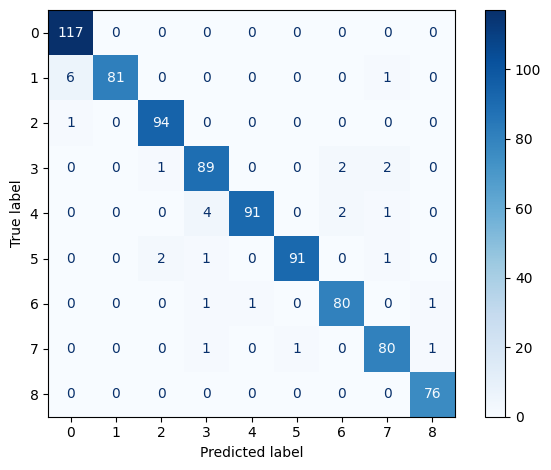

In [ ]:
# 혼동 행렬
cm = confusion_matrix(y_test, knn_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

plt.tight_layout()
plt.show()

In [ ]:
# 임의의 값 테스트
for i in range(5):
  a = random.randrange(20, 60)
  b = random.randrange(20, 60)
  c = random.randrange(20, 60)
  d = random.randrange(20, 60)

  rand_test = [[a, b, c, d]]

  rand_result = knn_model.predict(rand_test)

  print(i, 'test:   ', rand_test)
  print('  result: ',rand_result)

0 test:    [[47, 30, 36, 22]]
  result:  [1]
1 test:    [[23, 51, 32, 52]]
  result:  [6]
2 test:    [[30, 21, 56, 37]]
  result:  [7]
3 test:    [[49, 54, 48, 53]]
  result:  [5]
4 test:    [[43, 37, 52, 29]]
  result:  [4]
